#  Project: Viral Tweets

In this project, we are going to use the K-Nearest Neighbor algorithm to predict whether a tweet will go viral. Before jumping into using the classifier, let's first consider the problem we're trying to solve. Which features of a tweet are most closely linked to its popularity? Maybe the number of hashtags or the number of links in the tweet strongly influences its popularity. Maybe its virality is dependent on how many followers the person has. Maybe it's something more subtle like the specific language used in the tweets.

Let's explore these options by looking at the data we have available to us. We've imported the dataset and printed the following information:

* The total number of tweets in the dataset.
* The columns, or features, of the dataset.
* The text of the first tweet in the dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale

In [4]:
all_tweets = pd.read_json('random_tweets.json' , lines = True)
print(all_tweets.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11099 entries, 0 to 11098
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   created_at                 11099 non-null  datetime64[ns, UTC]
 1   id                         11099 non-null  int64              
 2   id_str                     11099 non-null  int64              
 3   text                       11099 non-null  object             
 4   truncated                  11099 non-null  bool               
 5   entities                   11099 non-null  object             
 6   metadata                   11099 non-null  object             
 7   source                     11099 non-null  object             
 8   in_reply_to_status_id      1402 non-null   float64            
 9   in_reply_to_status_id_str  1402 non-null   float64            
 10  in_reply_to_user_id        1503 non-null   float64            
 11  in

In [5]:
print(all_tweets.columns)

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'lang', 'possibly_sensitive', 'quoted_status_id',
       'quoted_status_id_str', 'extended_entities', 'quoted_status',
       'withheld_in_countries'],
      dtype='object')


In [16]:
print(all_tweets.loc[10031]['text'])

I had a dream that Kelly and I were trying to get tacos but we had to take a bus and the bus driver drove away with… https://t.co/fglJ4eHYkW


In [14]:
print(all_tweets.loc[1000]['user']['location'])

H


### Defining viral Tweets

In [19]:
median_retweets = all_tweets['retweet_count'].median()
all_tweets['is_viral'] = np.where(all_tweets['retweet_count'] > median_retweets , 1, 0)
print(all_tweets.is_viral)

0        0
1        0
2        0
3        1
4        0
        ..
11094    1
11095    1
11096    0
11097    0
11098    0
Name: is_viral, Length: 11099, dtype: int32


### Making features


In [23]:
all_tweets['tweet_lenght'] = all_tweets.apply(lambda tweet: len(tweet['text']), axis = 1)
all_tweets['followers_count'] = all_tweets.apply(lambda tweet: tweet['user']['followers_count'], axis = 1 )
all_tweets['friends_count'] = all_tweets.apply(lambda tweet: tweet['user']['friends_count'], axis = 1)
all_tweets['hashtag_count'] = all_tweets.apply(lambda tweet : tweet['text'].count('#'), axis = 1)
all_tweets['number_links'] = all_tweets.apply(lambda tweet : tweet['text'].count('http'), axis = 1)

In [26]:
all_tweets[['tweet_lenght', 'followers_count' , 'friends_count' , 'hashtag_count' , 'number_links']]

,tweet_lenght,followers_count,friends_count,hashtag_count,number_links
0,140,215,335,0,0
1,77,199,203,0,0
2,140,196,558,0,0
3,140,3313,2272,0,0
4,140,125,273,0,0
...,...,...,...,...,...
11094,140,509,1323,0,0
11095,75,462,1033,0,1
11096,140,135,90,0,1
11097,140,59,320,0,0


### Normalizing the Data


In [32]:
labels = all_tweets['is_viral'] 
data = all_tweets[['tweet_lenght' , 'followers_count', 'friends_count' ,'hashtag_count', 'number_links']]
scaled_data = scale(data, axis = 0 )

In [33]:
print(scaled_data)

[[ 0.6164054  -0.02878298 -0.14483305 -0.32045057 -0.78415588]
 [-1.64577622 -0.02886246 -0.16209787 -0.32045057 -0.78415588]
 [ 0.6164054  -0.02887736 -0.11566596 -0.32045057 -0.78415588]
 ...
 [ 0.6164054  -0.02918038 -0.1768776  -0.32045057  1.11738358]
 [ 0.6164054  -0.02955792 -0.14679496 -0.32045057 -0.78415588]
 [-1.71759151 -0.02208668  0.0333085  -0.32045057 -0.78415588]]


### Creating the trainnig and test set


In [34]:
train_data, test_data , train_labels, test_labels = train_test_split(data, labels, test_size = 0.2, random_state = 1)

### Using the classifier no. of classifier is 5

In [35]:
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(train_data,  train_labels)
print(classifier.score(test_data, test_labels))

0.5594594594594594


### Choosing k
- We've tested our classifier with k = 5, but maybe there's a k that will work better. Let's test many different values for k and graph the results.

In [37]:
scores = []
for k in range(1, 500):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    scores.append(classifier.score(test_data ,test_labels))
    

### Plotting

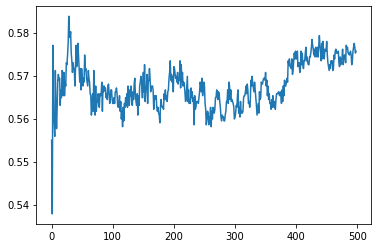

In [38]:
plt.plot(scores)
plt.show()

### Nice work! You can see the classifier gets better as k increases, but as k gets too high, underfitting starts to happen.

By using the features tweet_length, followers_count, and friends_count, we were able to get up to around 63% accuracy. That is better than random, but still not exceptional.